<a href="https://colab.research.google.com/github/Karthik2486/Sign_Language_Recognition/blob/main/Model_1/Sign_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#American Sign Language Recognition

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthikb700","key":"b7a09f0667c8995521bae350101da2be"}'}

In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:06<00:00, 134MB/s]
100% 1.03G/1.03G [00:06<00:00, 162MB/s]


In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-37fff10b-6ee9-2e3b-889d-73d5561b0ab2)


In [ ]:
!wget https://raw.githubusercontent.com/Karthik2486/Butterfly_Recognition_Model/main/helper_functions.py

--2022-03-30 12:31:59--  https://raw.githubusercontent.com/Karthik2486/Butterfly_Recognition_Model/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2022-03-30 12:31:59 (70.1 MB/s) - ‘helper_functions.py’ saved [10139/10139]



#Importing Dependancies

In [ ]:
# Importing Dependancies
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves, confusion_matrix, make_confusion_matrix


In [ ]:
# Unzipping our data
unzip_data("/content/asl-alphabet.zip")

In [ ]:
# To delete the zip file
!rm asl-alphabet.zip

In [ ]:
# Walkthrough Directories (Train Dataset)
walk_through_dir("/content/asl_alphabet_train")


There are 1 directories and 0 images in '/content/asl_alphabet_train'.
There are 29 directories and 0 images in '/content/asl_alphabet_train/asl_alphabet_train'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/K'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/G'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/O'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/L'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/T'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/C'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/I'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/P'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_al

In [ ]:
# Walkthrough Directories (Test Dataset)
walk_through_dir("/content/asl_alphabet_test")

There are 1 directories and 0 images in '/content/asl_alphabet_test'.
There are 0 directories and 28 images in '/content/asl_alphabet_test/asl_alphabet_test'.


#Plotting images from our train dataset

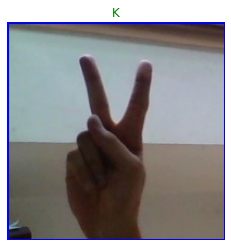

In [ ]:
# Plotting a random image from the train dataset
random_class = "/content/asl_alphabet_train/asl_alphabet_train/" + random.choice(os.listdir("/content/asl_alphabet_train/asl_alphabet_train"))
random_filepath = random_class + "/" + random.choice(os.listdir(random_class))
img = plt.imread(random_filepath)
label = random_filepath.split("/")[4]
plt.imshow(img/255)
plt.axis(False)
plt.title(label, color="green");

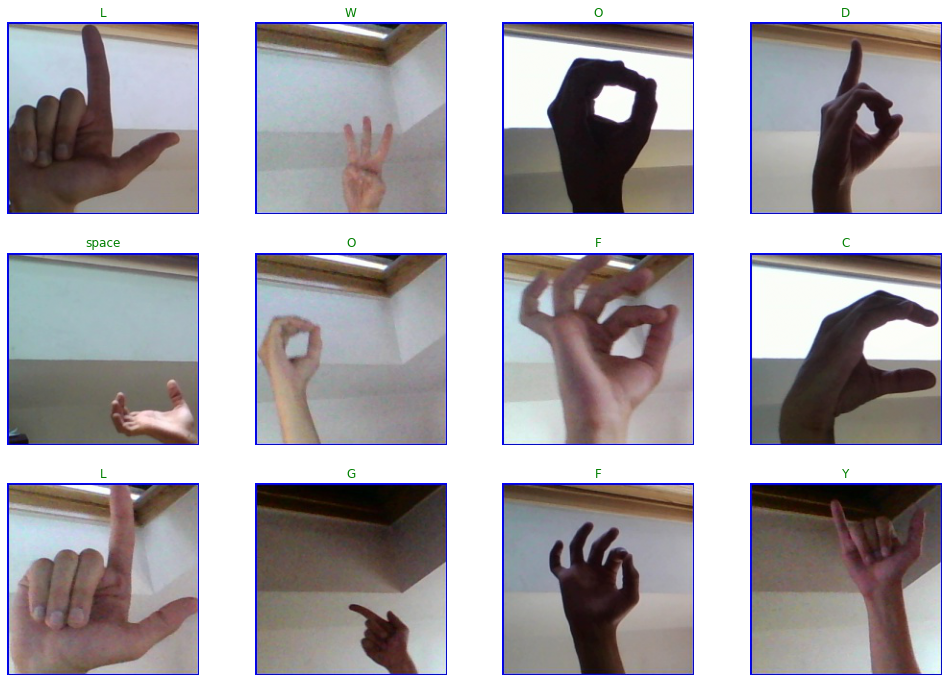

In [ ]:
# Plot multiple random images from the dataset
plt.figure(figsize=(17,12))
for i in range(12):
  random_class = "/content/asl_alphabet_train/asl_alphabet_train/" + random.choice(os.listdir("/content/asl_alphabet_train/asl_alphabet_train"))
  random_filepath = random_class + "/" + random.choice(os.listdir(random_class))
  img = plt.imread(random_filepath)
  label = random_filepath.split("/")[4]

  plt.subplot(3, 4, i+1)
  plt.axis(False)
  plt.title(label, color="green")
  plt.imshow(img/255);

#Preparing data for training the model

In [ ]:
data_gen = ImageDataGenerator(validation_split=0.2)

In [ ]:
# Creating train dataset
train_data = data_gen.flow_from_directory(directory="/content/asl_alphabet_train/asl_alphabet_train",
                                          batch_size=32,
                                          seed=42,
                                          subset="training",
                                          target_size=(200, 200))

# Creating validation dataset
val_data = data_gen.flow_from_directory(directory="/content/asl_alphabet_train/asl_alphabet_train",
                                        batch_size=32,
                                        seed=42,
                                        subset="validation",
                                        target_size=(200, 200))

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
len(train_data), len(val_data)

#Building the Model

In [ ]:
# Creating base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Building the model
inputs = tf.keras.Input(shape=(200, 200, 3), name="input_layer")
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = tf.keras.layers.Dense(len(train_data.class_indices), activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 200, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 29)                37149     
                                                                 
Total params: 4,086,720
Trainable params: 37,149
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        batch_size=32,
                        validation_data=val_data,
                        callbacks=[tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/ASL-Model",
                                                                      monitor="accuracy",
                                                                      save_best_only=False)])


Epoch 1/5
2175/2175 [==============================] - 353s 154ms/step - loss: 0.2992 - accuracy: 0.9563 - val_loss: 0.3765 - val_accuracy: 0.8939
Epoch 2/5
2175/2175 [==============================] - 336s 154ms/step - loss: 0.0345 - accuracy: 0.9977 - val_loss: 0.3334 - val_accuracy: 0.8959
Epoch 3/5
2175/2175 [==============================] - 334s 154ms/step - loss: 0.0138 - accuracy: 0.9993 - val_loss: 0.3122 - val_accuracy: 0.9005
Epoch 4/5
2175/2175 [==============================] - 338s 156ms/step - loss: 0.0068 - accuracy: 0.9996 - val_loss: 0.3203 - val_accuracy: 0.9010
Epoch 5/5
2175/2175 [==============================] - 335s 154ms/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 0.2986 - val_accuracy: 0.9107


In [ ]:
# Loading in the best_model
model = tf.keras.models.load_model("/content/drive/MyDrive/ASL-Model")
model.evaluate(val_data)

323/544 [================>.............] - ETA: 23s - loss: 0.3069 - accuracy: 0.9084

KeyboardInterrupt: ignored

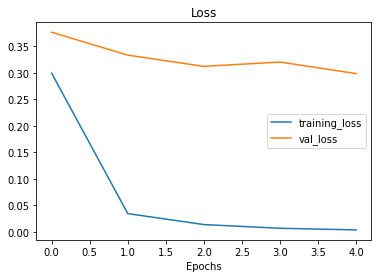

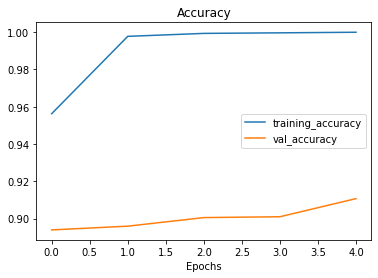

In [ ]:
plot_loss_curves(history_1)

#Making predictions on the Model

In [ ]:
# Validation file names
val_filenames = val_data.filepaths
val_filenames[:5]

['/content/asl_alphabet_train/asl_alphabet_train/A/A1.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A10.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A100.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A1001.jpg']

In [ ]:
# Generating val labels
val_labels = []
for fp in val_filenames:
  val_labels.append(fp.split("/")[4])

val_labels[:5]

['A', 'A', 'A', 'A', 'A']

In [ ]:
# Making a Dataframe to store all these values
val_df = pd.DataFrame({"filepaths": val_filenames,
                       "label": val_labels})
val_df.head()

filepaths label
0  /content/asl_alphabet_train/asl_alphabet_train...     A
1  /content/asl_alphabet_train/asl_alphabet_train...     A
2  /content/asl_alphabet_train/asl_alphabet_train...     A
3  /content/asl_alphabet_train/asl_alphabet_train...     A
4  /content/asl_alphabet_train/asl_alphabet_train...     A

In [ ]:
data_gen = ImageDataGenerator()
val_data_df = data_gen.flow_from_dataframe(val_df,
                                           directory="/content/asl_alphabet_train",
                                           x_col="filepaths",
                                           y_col="label",
                                           target_size=(200, 200),
                                           shuffle=False)
len(val_data_df)

Found 17400 validated image filenames belonging to 29 classes.


544

In [ ]:
# Making predictions on model
val_pred_prob = model.predict(val_data_df)
val_pred_prob[:5]

array([[9.9998713e-01, 2.1747388e-09, 5.7109811e-10, 2.2467445e-13,
        7.2755420e-06, 1.4066230e-13, 4.0448849e-09, 5.9048863e-11,
        1.1895132e-06, 1.6674022e-08, 4.6696940e-09, 2.5911266e-09,
        3.8666949e-06, 2.7343633e-10, 1.9785565e-08, 3.0202761e-13,
        4.5570242e-13, 1.8968336e-09, 3.0528678e-08, 9.1451589e-08,
        3.9104647e-10, 7.2411695e-11, 1.5753430e-13, 1.5472547e-07,
        6.1851739e-12, 1.5174663e-08, 3.0899353e-10, 4.4975057e-12,
        2.1702824e-07],
       [9.9998641e-01, 2.5278160e-09, 1.4625434e-10, 6.7742856e-14,
        9.4603738e-06, 2.6054419e-13, 2.0319517e-09, 1.6389889e-11,
        1.3142321e-07, 6.0412084e-09, 5.0099780e-10, 4.8207788e-10,
        3.7956083e-06, 1.0065430e-10, 7.3274782e-09, 9.2297636e-14,
        2.8337583e-13, 1.7187607e-10, 4.2413717e-08, 2.3516771e-08,
        2.6541999e-10, 2.8738005e-11, 2.5265998e-14, 1.0862644e-07,
        1.4896423e-12, 5.5688196e-09, 3.5885489e-11, 2.9297586e-12,
        5.5684399e-08],


In [ ]:
# Predictions class wise
val_preds = tf.argmax(val_pred_prob, axis=1)
val_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0])>

In [ ]:
# Generating class names
classes = []
for class_ in train_data.class_indices.keys():
  classes.append(class_)

len(classes)

29

In [ ]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [ ]:
# To plot the sign lingual of the correspoding character
def plot_letter(letter_1="A", letter_2="B"):
  """
  Plots 2 random sign lingual image of the 
  characters you pass. including 'nothing',
  'del', 'space'

  default -> 'A', 'B'
  """
  dir = "/content/asl_alphabet_train/asl_alphabet_train"
  fp_1 = dir + "/" + letter_1 + "/" + random.choice(os.listdir(dir + "/" + letter_1))
  fp_2 = dir + "/" + letter_2 + "/" + random.choice(os.listdir(dir + "/" + letter_2))
  img1 = plt.imread(fp_1)
  img2 = plt.imread(fp_2)

  # Plotting
  plt.figure(figsize=(10, 7))
  plt.subplot(1, 2, 1)
  plt.imshow(img1)
  plt.axis(False)
  plt.title(letter_1, color="green")

  plt.subplot(1, 2, 2)
  plt.imshow(img2)
  plt.axis(False)
  plt.title(letter_2, color="green");

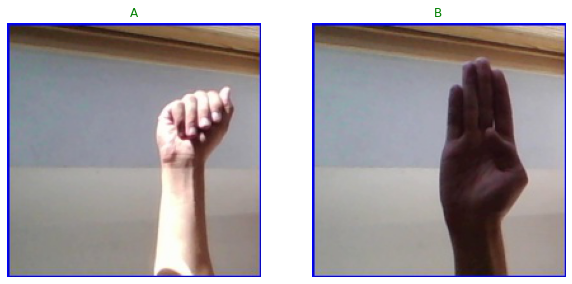

In [ ]:
# Plot random letter
plot_letter()

#Plotting Predictions

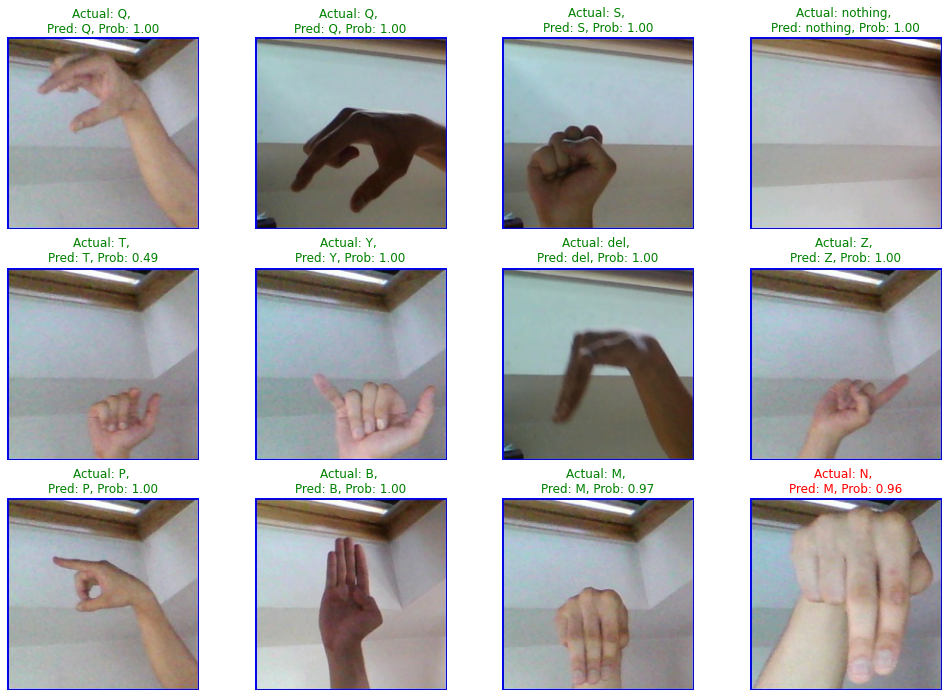

In [ ]:
# Plotting the predictions made by the model
random_arr = random.sample(range(len(val_filenames)), 12)
plt.figure(figsize=(17, 12))
for i in range(12):
  # Getting the img
  img = val_filenames[random_arr[i]]
  label = val_labels[random_arr[i]]
  prob = np.max(val_pred_prob[random_arr[i]])
  pred = classes[val_preds[random_arr[i]]]
  _title_ = f"Actual: {label}, \nPred: {pred}, Prob: {prob:.2f}"
  col = "green" if label == pred else "red"

  # plotting the imgs
  plt.subplot(3, 4, i+1)
  img = plt.imread(img)
  plt.imshow(img)
  plt.axis(False)
  plt.title(_title_, color=col);

#Wrong Images

In [ ]:
# Converting our val_preds into val_pred_labels
val_pred_labels = []
for i in val_preds:
  val_pred_labels.append(classes[i])

val_pred_labels[:5]

['A', 'A', 'A', 'A', 'A']

In [ ]:
len(val_pred_labels)

17400

In [ ]:
# Creating arrays for wrong predictions
wrng_file_paths = []
wrng_pred_prob = []
wrng_pred = []
actual_label = []
for i in range(len(val_labels)):
  if not val_labels[i] == val_pred_labels[i]:
    wrng_file_paths.append(val_filenames[i])
    wrng_pred.append(val_pred_labels[i])
    wrng_pred_prob.append(np.max(val_pred_prob[i]))
    actual_label.append(val_labels[i])

len(wrng_file_paths), len(wrng_pred_prob), len(wrng_pred), len(actual_label)


(1554, 1554, 1554, 1554)

In [ ]:
# Dataframe for wrong predicted signs
wrng_val_df = pd.DataFrame({"File Paths": wrng_file_paths,
                            "Label": actual_label,
                            "Pred": wrng_pred,
                            "Wrong Pred Prob": wrng_pred_prob})
wrng_val_df.head()

File Paths Label Pred  \
0  /content/asl_alphabet_train/asl_alphabet_train...     A    E   
1  /content/asl_alphabet_train/asl_alphabet_train...     A    E   
2  /content/asl_alphabet_train/asl_alphabet_train...     A    E   
3  /content/asl_alphabet_train/asl_alphabet_train...     B    R   
4  /content/asl_alphabet_train/asl_alphabet_train...     D    C   

   Wrong Pred Prob  
0         0.610281  
1         0.600185  
2         0.547128  
3         0.666173  
4         0.585155

In [ ]:
# Saving the dataframe as csv
wrng_val_df.to_csv("Wrong-predictions")

#Plotting wrong images

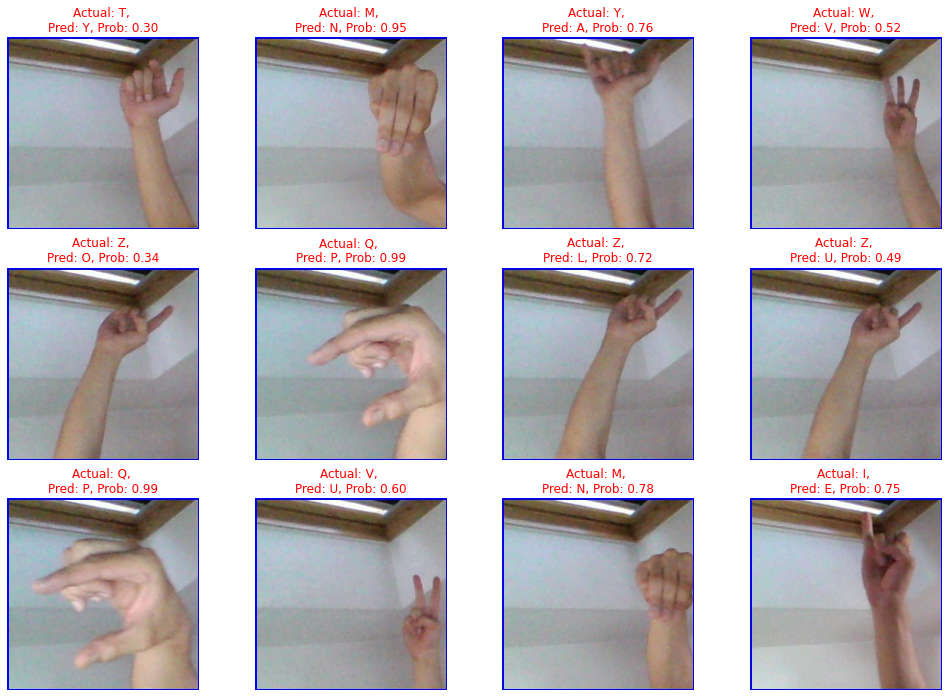

In [ ]:
# Plotting wrongly predicted images
plt.figure(figsize=(17, 12))
random_arr = random.sample(wrng_file_paths, 12)
for i in range(12):
  index = np.where(np.array(wrng_file_paths) == random_arr[i])[0][0]
  filepath = wrng_file_paths[index]
  label = actual_label[index]
  pred = wrng_pred[index]
  prob = wrng_pred_prob[index]
  _title_ = f"Actual: {label}, \nPred: {pred}, Prob: {prob:.2f}"

  # Plotting the image
  plt.subplot(3, 4, i+1)
  img = plt.imread(filepath)
  plt.imshow(img)
  plt.axis(False)
  plt.title(_title_, color="red");

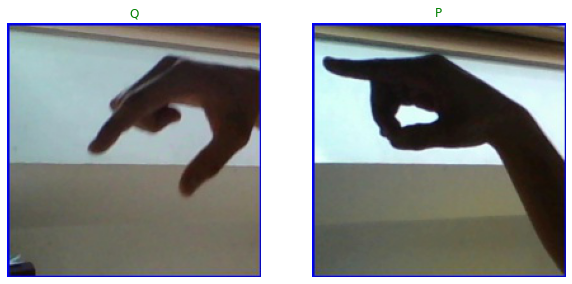

In [ ]:
# To check how similar the two signs are
plot_letter("Q", "P")

#Prediction on test images

In [ ]:
# Creating a preprocessing function
def load_and_preprocess(filepath):
  img = tf.io.read_file(filepath)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, (200, 200))

  return img

In [ ]:
test_dir = "/content/asl_alphabet_test/asl_alphabet_test"
test_fp = os.listdir(test_dir)

In [ ]:
test_fp[2][0]

'Y'

In [ ]:
test_fp[0].split("_")[0]

'U'

In [ ]:
test_fp[0].split("_")[0]
# Creating labels of test images
test_labels = []
for elem in test_fp:
  test_labels.append(elem.split("_")[0])

len(test_labels)

28

In [ ]:
test_labels[:5]

['U', 'E', 'Y', 'K', 'J']

In [ ]:
test_df = pd.DataFrame({"filepath": test_fp,
                        "labels": test_labels})

In [ ]:
test_df.head()

filepath labels
0  U_test.jpg      U
1  E_test.jpg      E
2  Y_test.jpg      Y
3  K_test.jpg      K
4  J_test.jpg      J

In [ ]:
# Creating test data gen
test_data = data_gen.flow_from_dataframe(test_df,
                                         "/content/asl_alphabet_test/asl_alphabet_test",
                                         x_col="filepath",
                                         y_col="labels",
                                         shuffle=False,
                                         target_size=(200, 200))
len(test_data)

Found 28 validated image filenames belonging to 28 classes.


1

In [ ]:
# predictions on test data
test_prob_preds = model.predict(test_data)
test_prob_preds

array([[4.84765396e-12, 1.09233231e-04, 4.96364549e-08, 1.75122102e-06,
        5.65565324e-06, 8.21346435e-10, 5.43732597e-07, 6.54684357e-07,
        1.07174732e-04, 1.50173989e-07, 2.54332517e-05, 1.24530434e-05,
        1.31250914e-07, 1.65771525e-07, 2.73466952e-07, 7.73909107e-07,
        6.84400334e-07, 1.86396428e-04, 1.27178794e-07, 9.63574962e-08,
        9.99128997e-01, 2.21714595e-06, 1.31929956e-09, 4.15223185e-04,
        2.59950683e-09, 2.27069080e-07, 1.47312846e-06, 3.95430000e-08,
        5.26437605e-09],
       [3.56243481e-06, 1.56092187e-06, 3.59226329e-11, 3.97045794e-16,
        9.99990940e-01, 6.83628015e-11, 4.78924842e-13, 7.80347661e-12,
        1.32888363e-06, 1.03672253e-08, 1.37631417e-11, 7.64791442e-13,
        2.63161883e-06, 1.69681335e-11, 5.45381296e-10, 6.03429863e-14,
        2.45825647e-12, 8.50283819e-12, 5.72863579e-09, 9.69851044e-09,
        2.53865901e-10, 4.56656672e-14, 6.20042906e-10, 1.99764543e-08,
        1.88622013e-12, 4.96074434e-14,

In [ ]:
test_preds = tf.argmax(test_prob_preds, axis=1)
test_preds

<tf.Tensor: shape=(28,), dtype=int64, numpy=
array([20,  4, 24, 10,  9,  1, 15,  7, 22,  8, 19,  2, 23,  5,  3, 16,  6,
       21, 12, 13,  0, 17, 25, 27, 28, 14, 11, 18])>

In [ ]:
# Converting our test_preds into test_pred_labels
test_pred_labels = []
for i in test_preds:
  test_pred_labels.append(classes[i])

test_pred_labels[:5]

['U', 'E', 'Y', 'K', 'J']

In [ ]:
len(test_labels), len(test_pred_labels)

(28, 28)

#Plotting Predictions on all test images

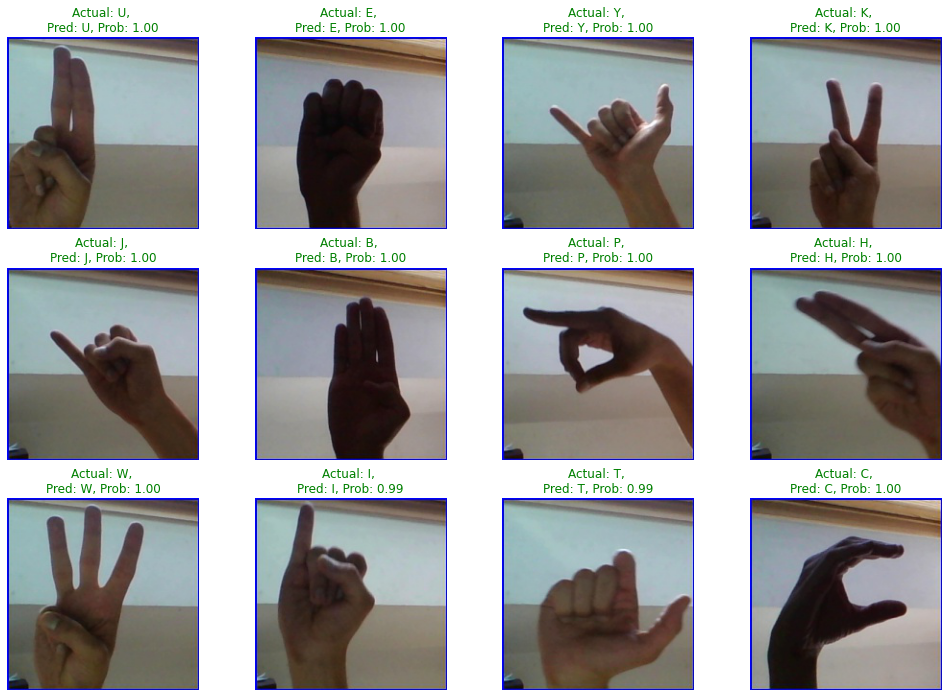

In [ ]:
# Plotting predictions on test data
plt.figure(figsize=(17, 12))
for i in range(12):
  filepath = test_dir + "/" + test_fp[i]
  prob = np.max(test_prob_preds[i])
  label = test_labels[i]
  pred = test_pred_labels[i]
  _title_ = f"Actual: {label}, \nPred: {pred}, Prob: {prob:.2f}"
  col = "green" if label == pred else "red"

  # Plotting 
  plt.subplot(3, 4, i+1)
  img = plt.imread(filepath)
  plt.imshow(img)
  plt.axis(False)
  plt.title(_title_, color=col);

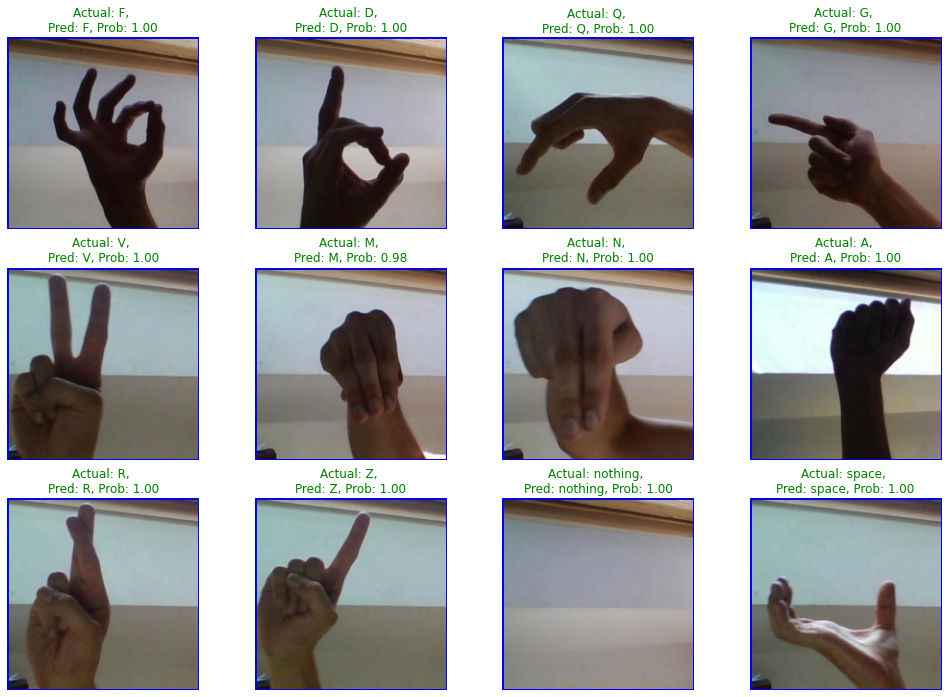

In [ ]:
# Plotting predictions on test data
i_ = 12
plt.figure(figsize=(17, 12))
for i in range(12):
  i_ += 1
  filepath = test_dir + "/" + test_fp[i_]
  prob = np.max(test_prob_preds[i_])
  label = test_labels[i_]
  pred = test_pred_labels[i_]
  _title_ = f"Actual: {label}, \nPred: {pred}, Prob: {prob:.2f}"
  col = "green" if label == pred else "red"

  # Plotting 
  plt.subplot(3, 4, i+1)
  img = plt.imread(filepath)
  plt.imshow(img)
  plt.axis(False)
  plt.title(_title_, color=col);

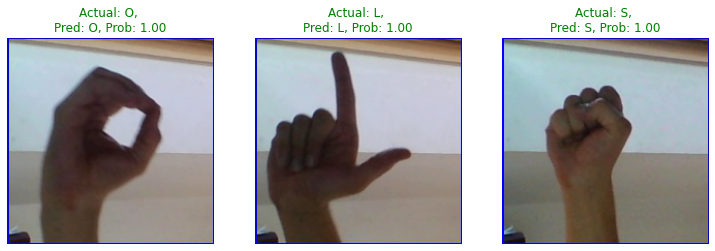

In [ ]:
# Plotting predictions on test data
i_ = 24
plt.figure(figsize=(17, 4))
for i in range(3):
  i_ += 1
  filepath = test_dir + "/" + test_fp[i_]
  prob = np.max(test_prob_preds[i_])
  label = test_labels[i_]
  pred = test_pred_labels[i_]
  _title_ = f"Actual: {label}, \nPred: {pred}, Prob: {prob:.2f}"
  col = "green" if label == pred else "red"

  # Plotting 
  plt.subplot(1, 4, i+1)
  img = plt.imread(filepath)
  plt.imshow(img)
  plt.axis(False)
  plt.title(_title_, color=col);

In [ ]:
# Encoding labels in numbers
num_labels = []
for i in test_labels:
  lab = np.where(np.array(classes) == i)[0][0]
  num_labels.append(lab)

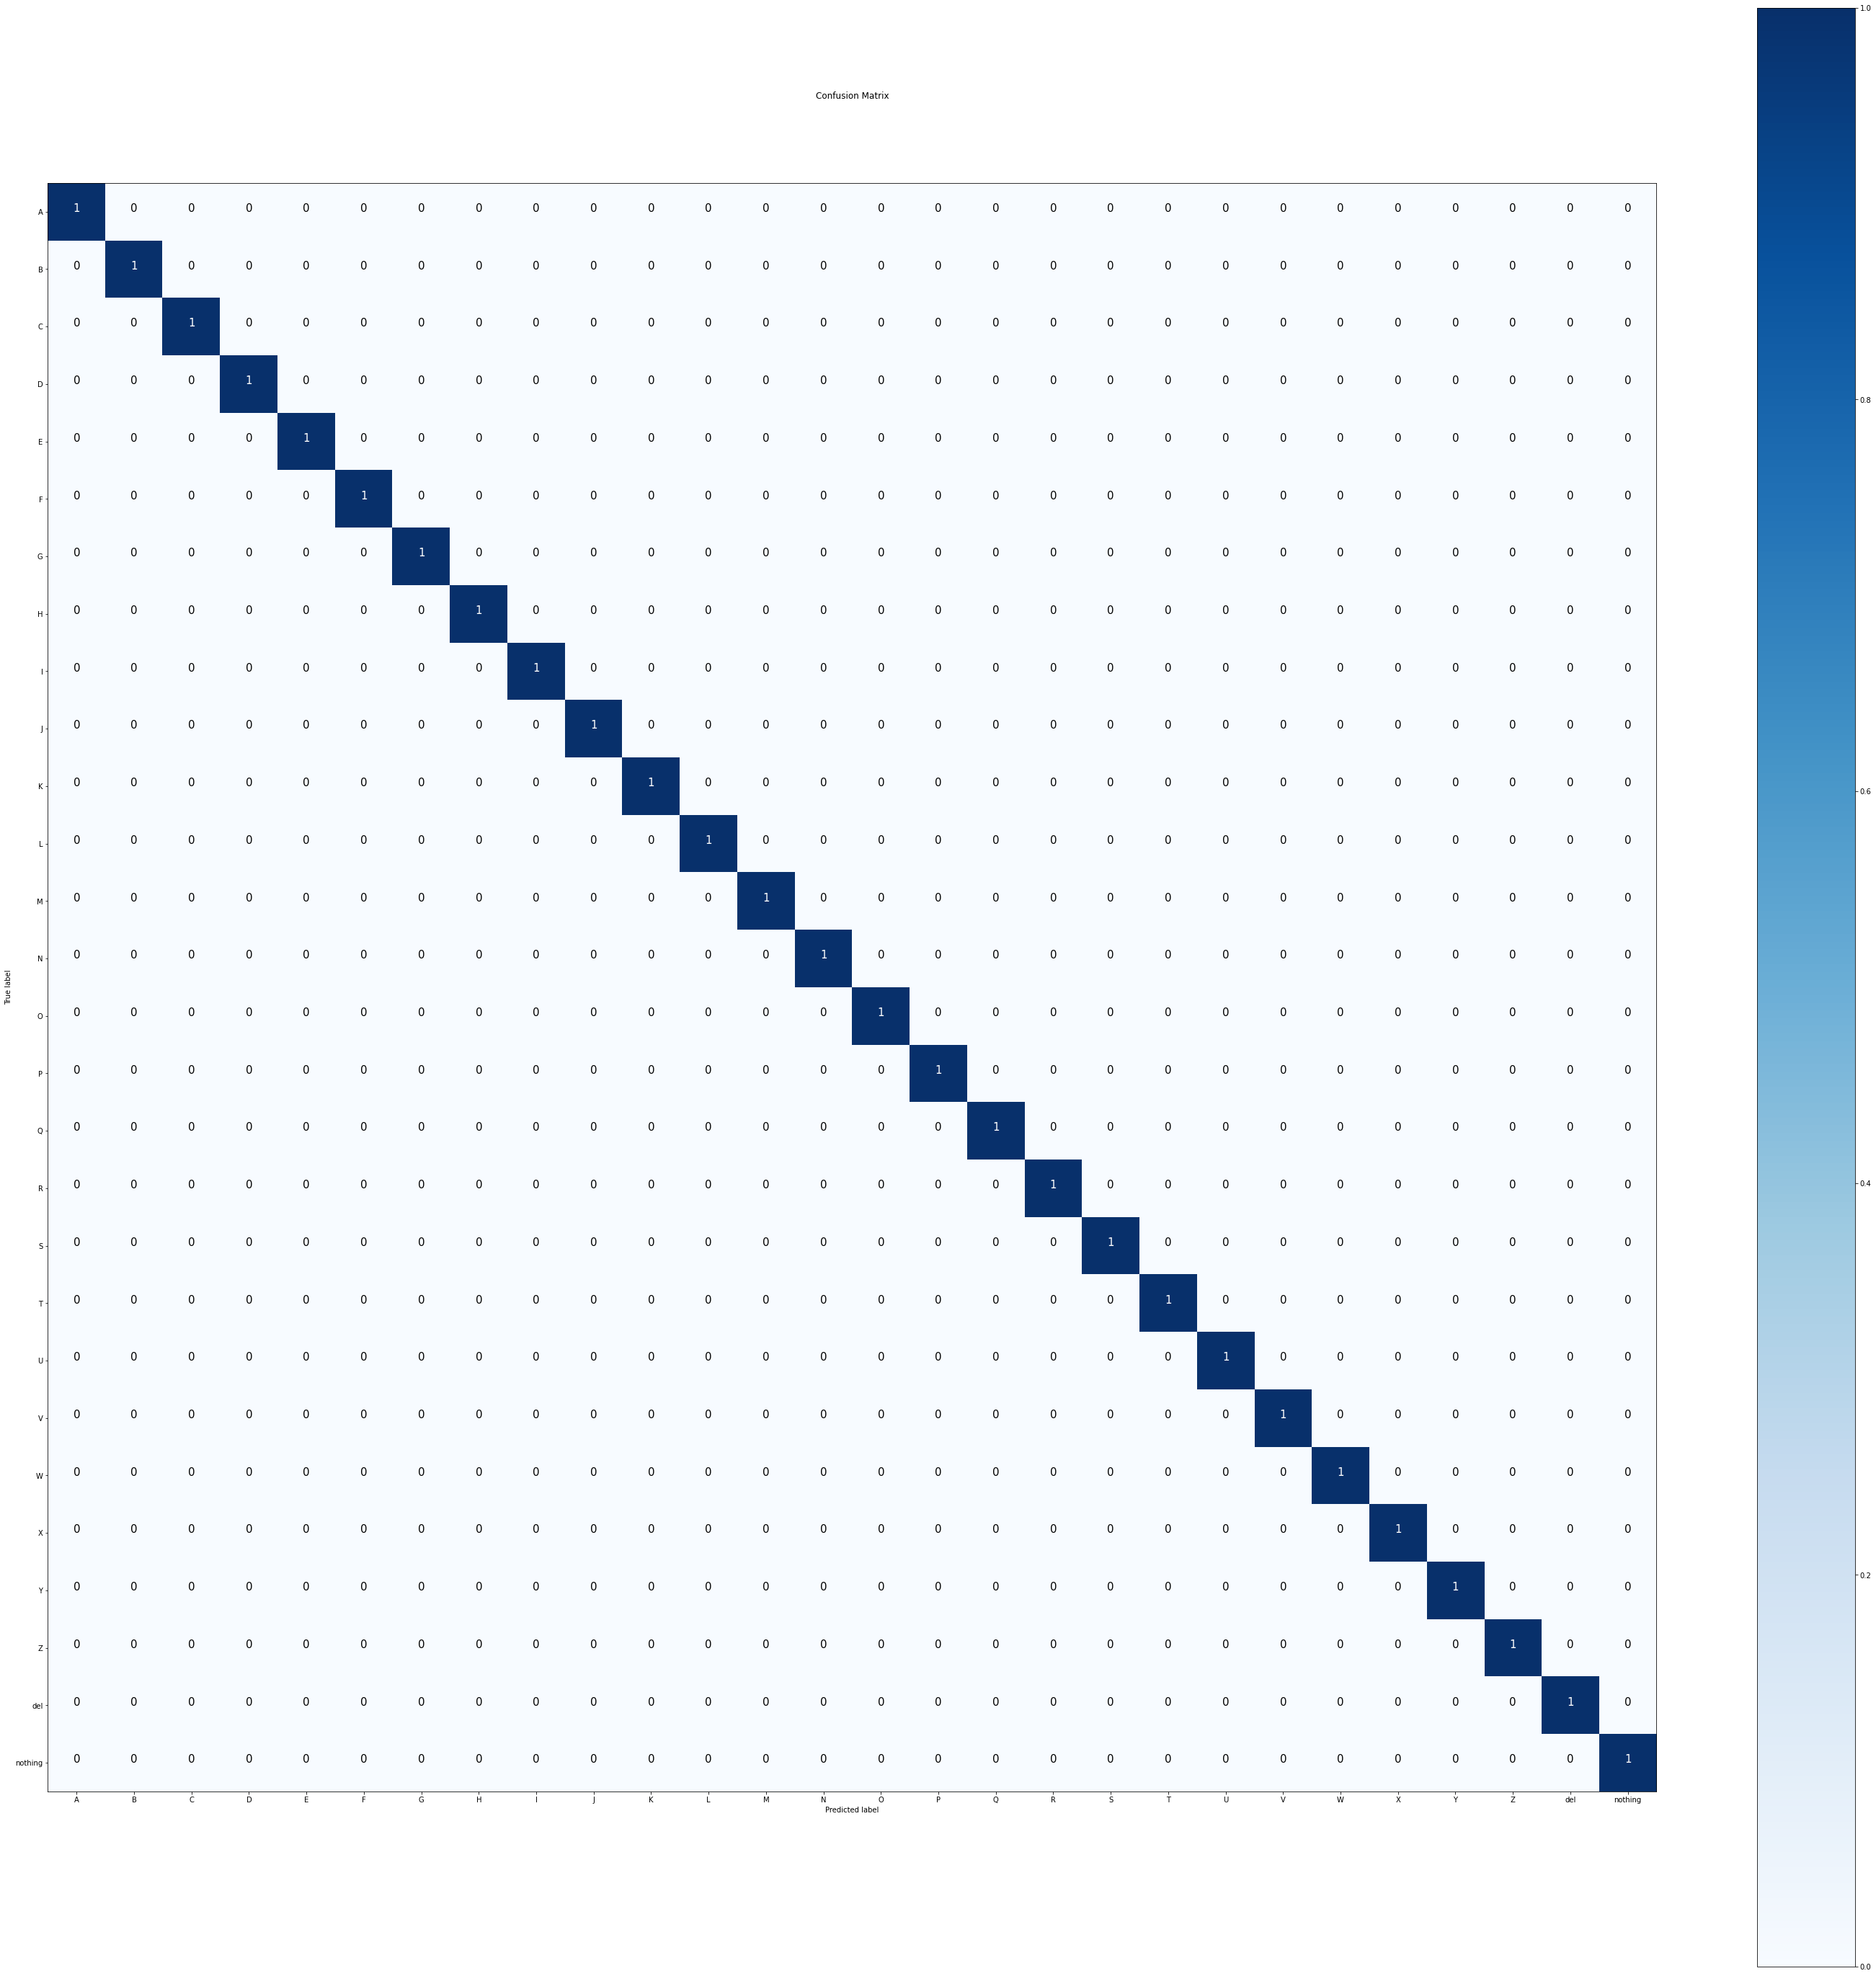

In [ ]:
# Confusion matrix for test dataset
make_confusion_matrix(y_true=num_labels,
                      y_pred=test_preds.numpy(),
                      classes=classes,
                      figsize=(50, 50))